## Movie Recommender

In [7]:
import pandas as pd

%matplotlib inline

In [3]:
df = pd.read_csv('movies.csv')

In [26]:
df = df.dropna()

In [27]:
df.shape

(85, 3)

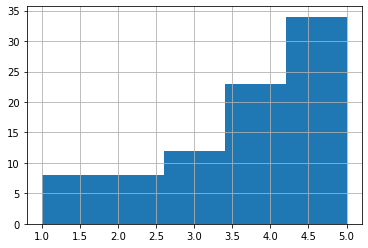

In [9]:
df['rating (1-5)'].hist(bins=5)

In [12]:
df.groupby('name')['rating (1-5)'].count()

name
Anastasia     8
Basti         6
Braulio       8
Carina        7
Felix         9
Kristian      7
Kriszta       4
Lara         12
Max           9
Rafael        5
Robin         5
Sara          5
Name: rating (1-5), dtype: int64

In [29]:
n = list(df['movie'].unique())
n.sort()

In [30]:
df.groupby('movie')['rating (1-5)'].mean().sort_values(ascending=False).head(10)

movie
JoJo Rabbit                                 5.0
Psycho                                      5.0
Shawshank Redemption                        5.0
Shoplifters                                 5.0
Interstellar                                5.0
Harry Potter and the philosopher's Stone    5.0
Green Mile                                  5.0
Gattaca                                     5.0
Red Joan                                    5.0
Se7en                                       5.0
Name: rating (1-5), dtype: float64

## Baseline Recommender: GroupBy

*assumption: everybody likes the same movies*

In [32]:
s = df.groupby('movie')['rating (1-5)'].agg(['mean', 'count'])
s.sort_values(by=['mean', 'count'], ascending=[False, False]).head(10)

,mean,count
movie,,
Green Mile,5.0,2
Interstellar,5.0,2
Lord of the Rings -- The Fellowship of the Ring,5.0,2
Blade Runner,5.0,1
Gattaca,5.0,1
Harry Potter and the philosopher's Stone,5.0,1
Inside Out,5.0,1
JoJo Rabbit,5.0,1
Matrix,5.0,1


#### Also see:

Ranking formula that balances mean rating vs. count

(still not personalized)

### Interpret the data as a (name x movie) matrix

In [33]:
df.head()

,name,movie,rating (1-5)
0,Kristian,The Big Lebowksi,3.0
1,Max,The Empire strikes back,5.0
2,Max,The Big Lebowksi,5.0
3,Kristian,Memento,4.0
4,Sara,Green Mile,5.0


In [39]:
mm = df.set_index(['name', 'movie'])['rating (1-5)'].unstack(0)

In [40]:
mm = df.pivot(index='movie', columns='name', values='rating (1-5)')
mm.head()

name,Anastasia,Basti,Braulio,Carina,Felix,Kristian,Kriszta,Lara,Max,Rafael,Robin,Sara
movie,,,,,,,,,,,,
A Million ways to die in the west,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
American Beauty,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN
Blade Runner,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blade Runner 2049,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blues Brothers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN


In [41]:
# the matrix has 62 x 12 cells ~ 600
mm.shape

(62, 12)

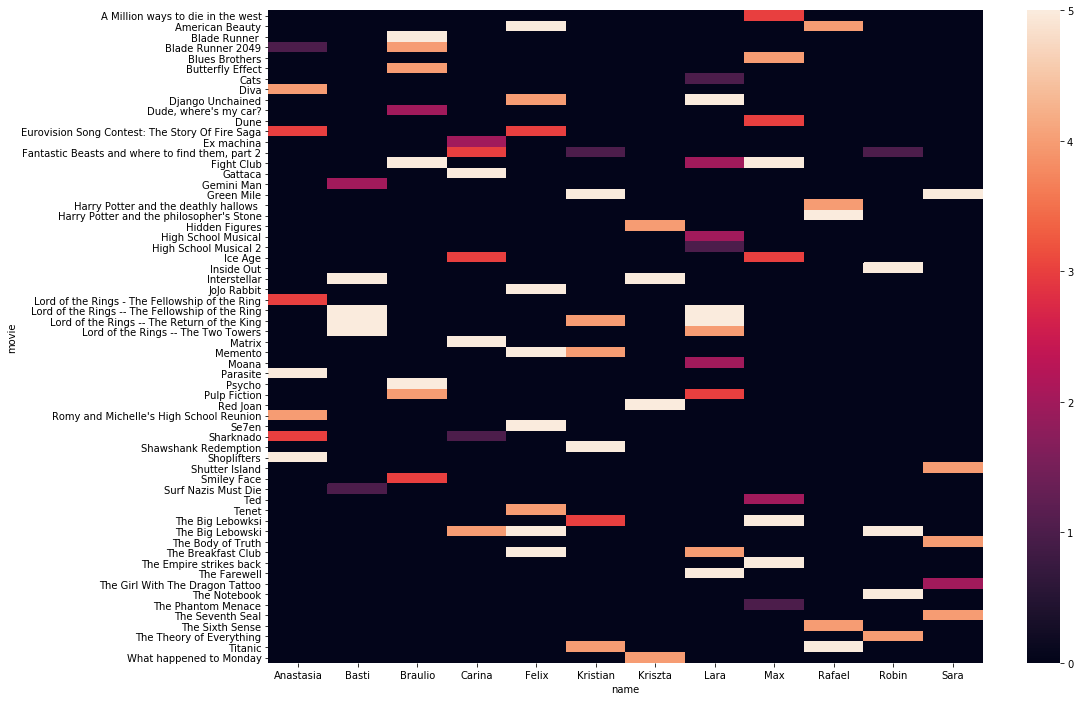

In [43]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(mm.fillna(0.0))